In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

from lbg_forecast.sps import simulate_sed
from lbg_forecast.sps import initialise_sps_model
from lbg_forecast.sps import update_sps_model
from lbg_forecast.sps import plot_sed
from lbg_forecast.sps import plot_lsst_filters
from lbg_forecast.sps import simulate_photometry_lsst_fsps
from lbg_forecast.sps import simulate_photometry_lsst
from lbg_forecast.popmodel import galaxy_population_model
from lbg_forecast.popmodel import plot_galaxy_population

In [3]:
def simulate_sample_photometry(nsamples, spectra=False):

    #Define SPS Model
    sps_model = initialise_sps_model(dust_type=2)

    i = 0
    photo_data = []
    while(i < nsamples):

        #Draw Priors and Update Model
        sps_params = galaxy_population_model(np.array([3]))
        update_sps_model(sps_model, sps_params)

        #Generate Photometry
        photo_data.append(simulate_photometry_lsst_fsps(sps_model, mass=sps_params["mass"]))

        #Plot Spectra
        if(spectra):
            spectrum = simulate_sed(sps_model, sps_params)
            plot_sed(spectrum, scaley = 16, xmin=2000, xmax=12000, ymin=0,
                ymax=1.4, xsize=20, ysize=10, 
                fontsize=32, log=False, c = 'k')
            plot_lsst_filters(factor=1)

        i+=1

    return np.array([photo_data])


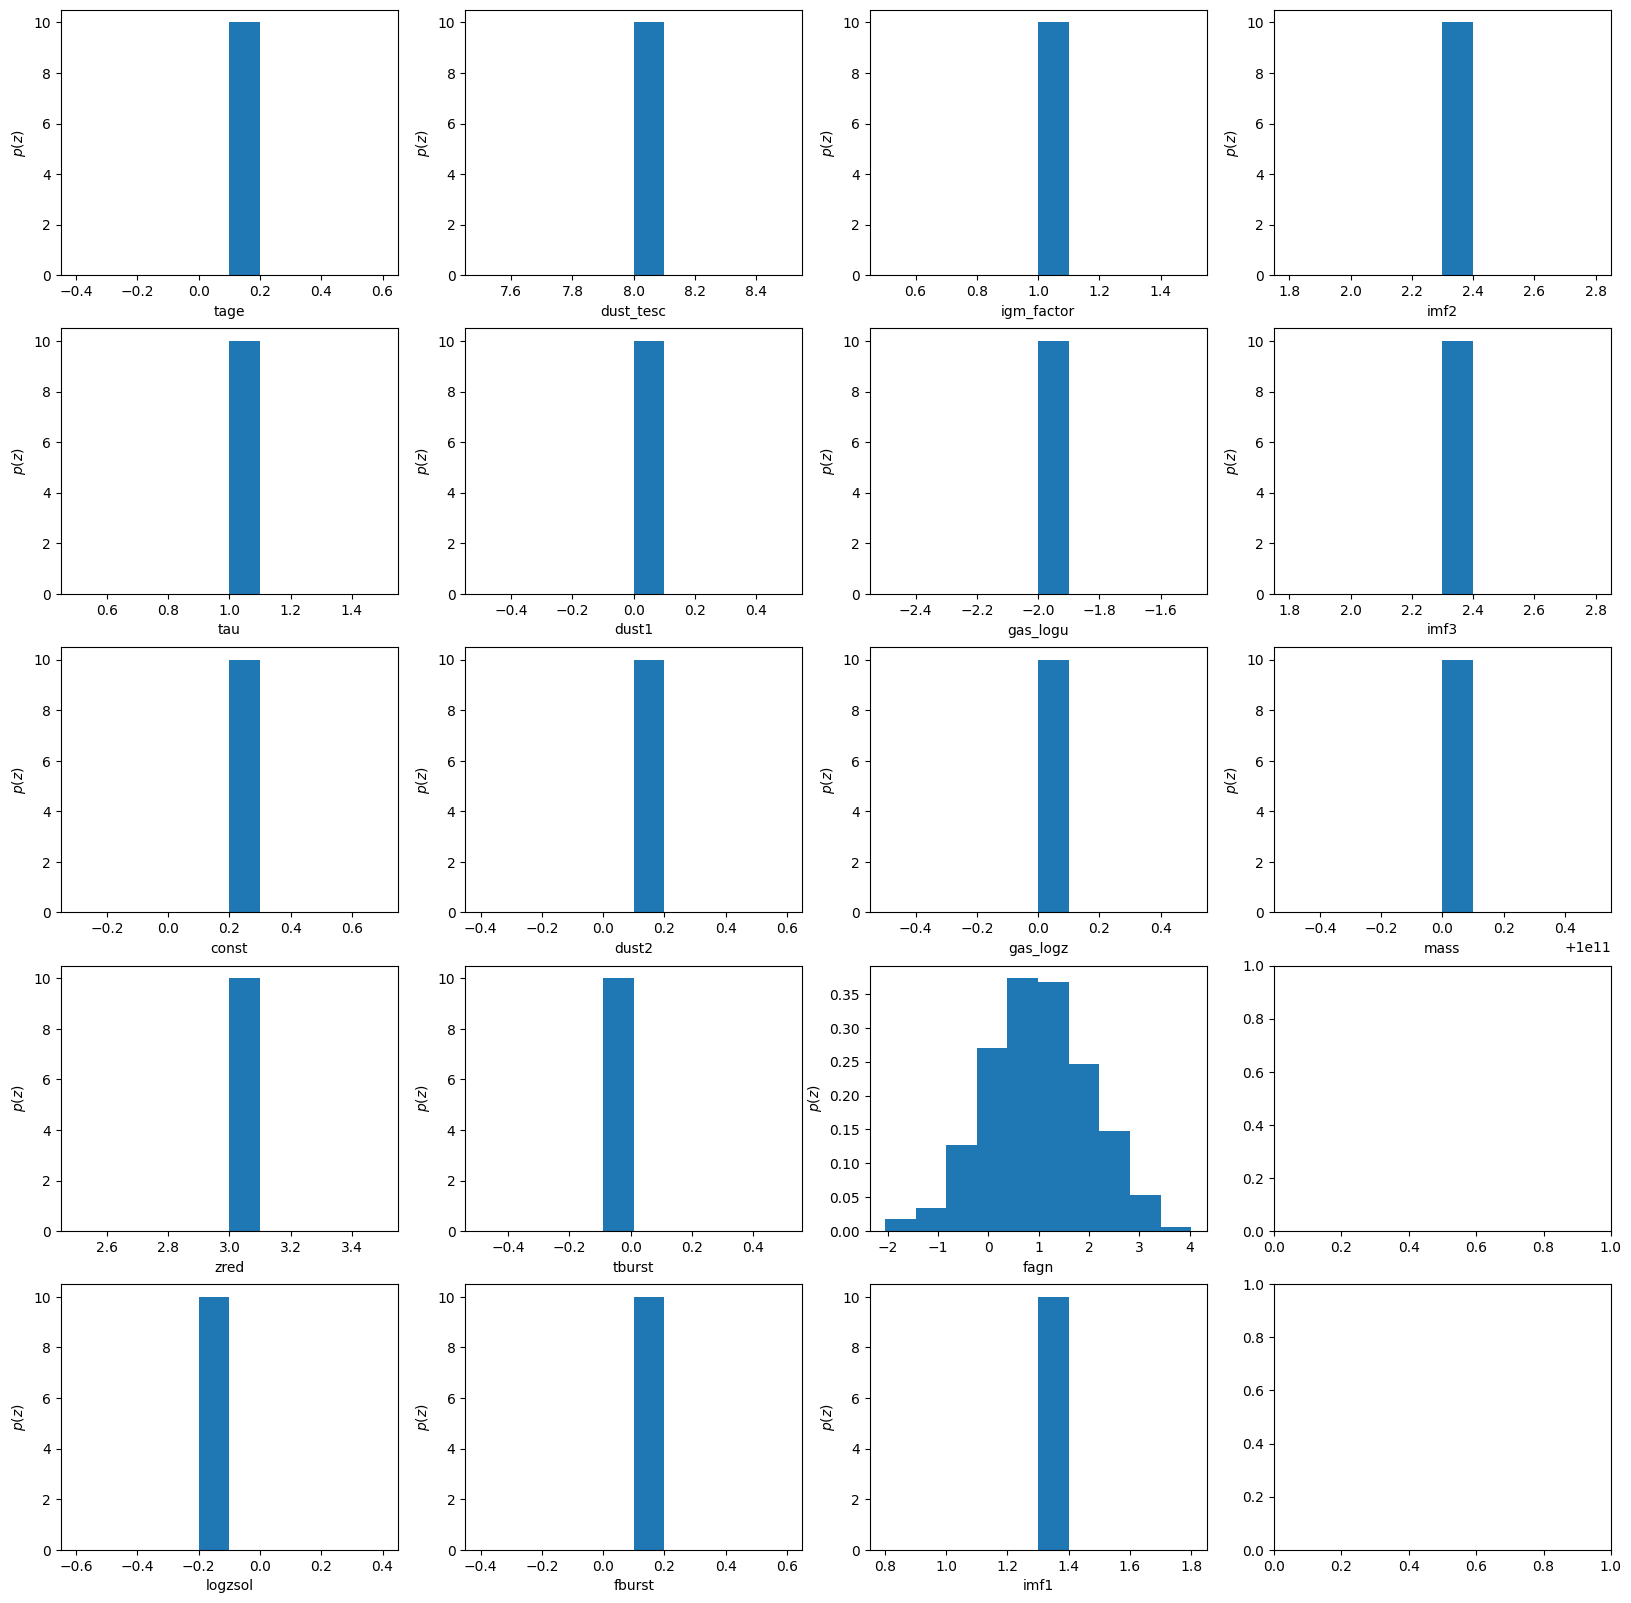

In [4]:
plot_galaxy_population(1000)

In [5]:
#simulate_sample_photometry(2, spectra=True)